# Task 6.: Euler brick

## Task description

It is a common task in physics to describe a function with two variables around its minimum, maximum or saddle points. These functions could be approximated with the expression $a x^{2} + b x y + c y^{2}$ around these points.

- Create a `Python` class named `poli2` which has similar polynomials as above as its elements!
- When constructing a polynomial, the three coefficients should be given to the class.
- The coefficients should be queriable as an attribute.
- Implement a class method, which streches the polynomial along the $x$ axis, by applying the transformation
$a\rightarrow a/4, b\rightarrow b/2$!
- Implement another class method, which calculates the $a + c$ and $ac-b^2/4$ expressions, since if both are positive the polynomial describes a minima.
- Implement a third class method, which plots the polynomial as a multivariable function in the range of $-1 \le x \le 1, -1 \le y \le 1$!
- Overload the `+` operator to achieve, that as a result of adding two polynomials, their coefficients add up.
- In this notebook you should show using test polynomials that all of the implemented class methods are working appropriately. For your tests, use polynomials $8x^2+4xy+2y^2$ and $2x^2-8xy+2y^2$!

## Solving the task

In [37]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

### Just some matplotlib and seaborn parameter tuning

In [5]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

### Creating the `poli2` class

In [103]:
class poli2:
    """
    Create a polynomial
    
    Parameters:
    -----------
        a, b, c : int
          - The three coefficients of the approximating quadratic polynomial
    """

    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    
    # Overload `+` for addition of coefficients
    def __add__(self, other):
        a = self.a + other.a
        b = self.b + other.b
        c = self.c + other.c
        return poli2(a, b, c)

    # Strech polynomial along the `x` axis
    def stretch(self):
        return poli2(self.a/4, self.b/2, self.c)

    # Calculate the necessary quantities to decide, whether
    # this polynomial describes a minima or not
    def is_minima(self):
        frst = self.a + self.c
        scnd = self.a * self.c - self.b**2 / 4
        return tuple(frst, scnd)
    
    # Plot the input multivariable polynomial
    def plot(self):

        # Create meshgrid for the surface plot
        X = np.arange(-1, 1, 0.02)
        Y = np.arange(-1, 1, 0.02)
        X, Y = np.meshgrid(X, Y)
        # Calculate the values of the multivariate function
        Z = self.a * X**2 + self.b * X * Y + self.c * Y**2
        
        fig, axes = plt.subplots(figsize=(14,14),
                                 subplot_kw=dict(projection='3d'))

        axislabelsize = 22
        axisticksize = 14
        axislabelpad = 15
        
        surf = axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                                 linewidth=0, antialiased=False)
        
        axes.set_xlabel('X', fontsize=axislabelsize, labelpad=axislabelpad)
        axes.set_ylabel('Y', fontsize=axislabelsize, labelpad=axislabelpad)
        axes.set_zlabel('Z', fontsize=axislabelsize, labelpad=axislabelpad)
        axes.tick_params(axis='both', which='major', labelsize=axisticksize)
        
        # Plot limits as descriptions asked
        axes.set_xlim(-1,1)
        axes.set_ylim(-1,1)
        
        plt.show()

### Test polynomials

#### 1. $8x^2+4xy+2y^2$

In [104]:
pol_1 = poli2(8, 4, 2)

In [105]:
print('Coefficients of the ORIGINAL polynomial:')
print(pol_1.a, pol_1.b, pol_1.c)

Coefficients of the ORIGINAL polynomial:
8 4 2


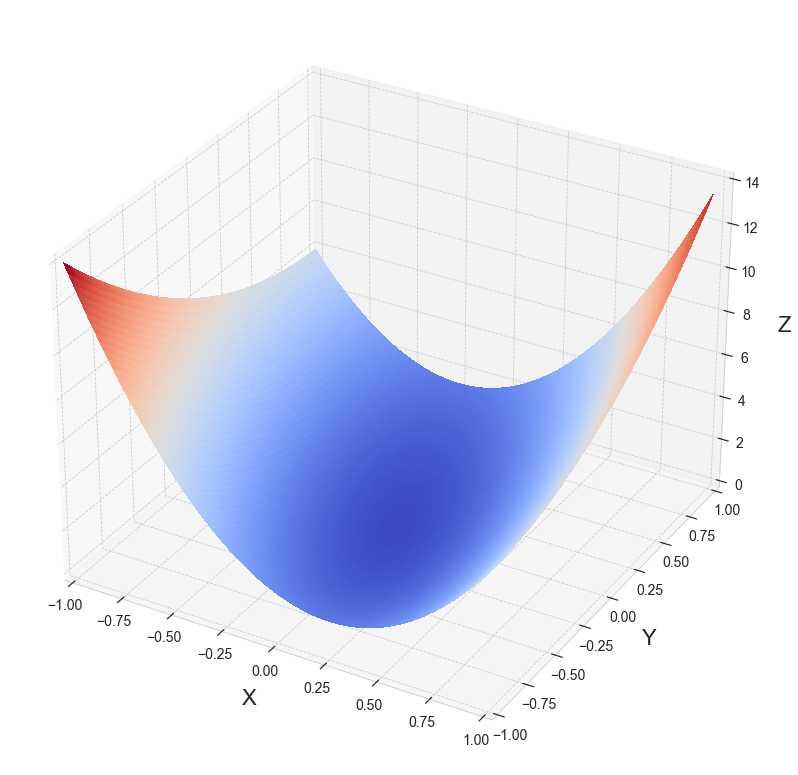

In [106]:
pol_1.plot()

In [107]:
pol_1_str = pol_1.stretch()

In [108]:
print('Coefficients of the STRETCHED polynomial:')
print(pol_1_str.a, pol_1_str.b, pol_1_str.c)

Coefficients of the STRETCHED polynomial:
2.0 2.0 2


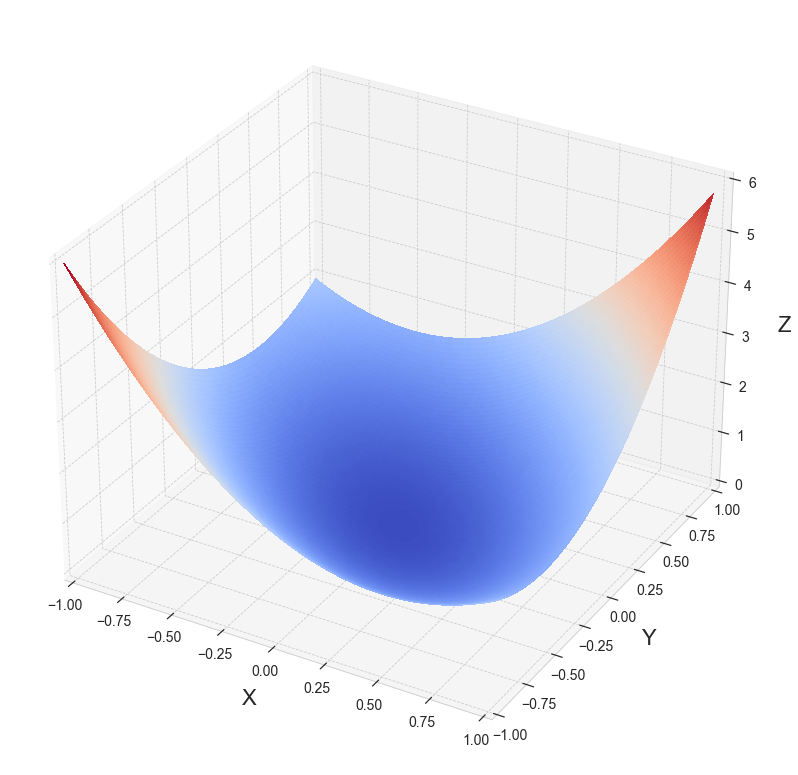

In [109]:
pol_1_str.plot()

#### 2. $2x^2-8xy+2y^2$

In [110]:
pol_2 = poli2(2, -8, 2)

In [111]:
print('Coefficients of the ORIGINAL polynomial:')
print(pol_2.a, pol_2.b, pol_2.c)

Coefficients of the ORIGINAL polynomial:
2 -8 2


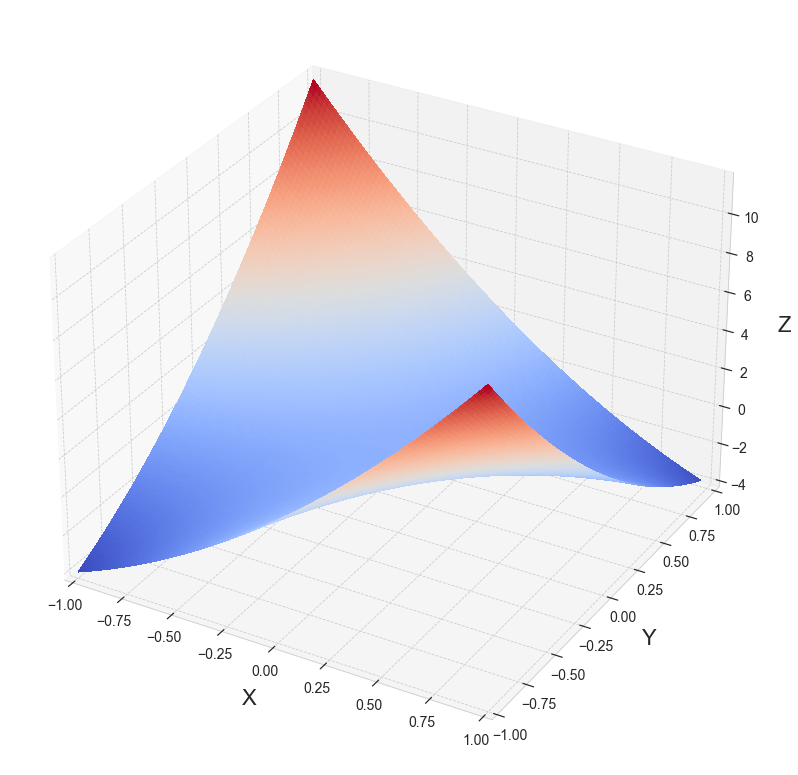

In [112]:
pol_2.plot()

In [113]:
pol_2_str = pol_2.stretch()

In [114]:
print('Coefficients of the STRETCHED polynomial:')
print(pol_2_str.a, pol_2_str.b, pol_2_str.c)

Coefficients of the STRETCHED polynomial:
0.5 -4.0 2


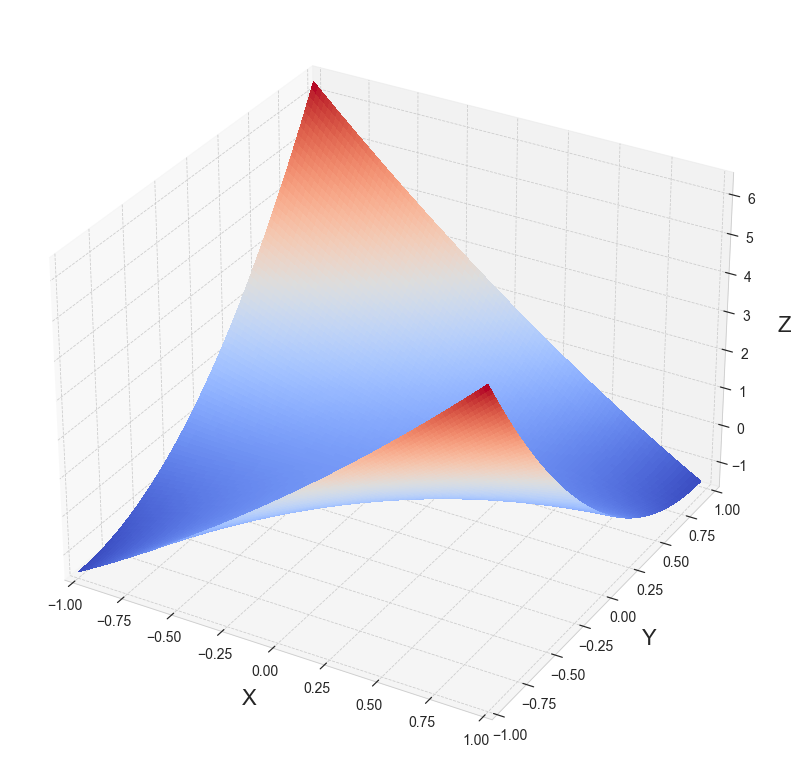

In [115]:
pol_2_str.plot()

### Addition of the above polynomials

In [119]:
pol_add = pol_1 + pol_2

In [120]:
print('Coefficients of the ORIGINAL polynomial:')
print(pol_add.a, pol_add.b, pol_add.c)

Coefficients of the ORIGINAL polynomial:
10 -4 4


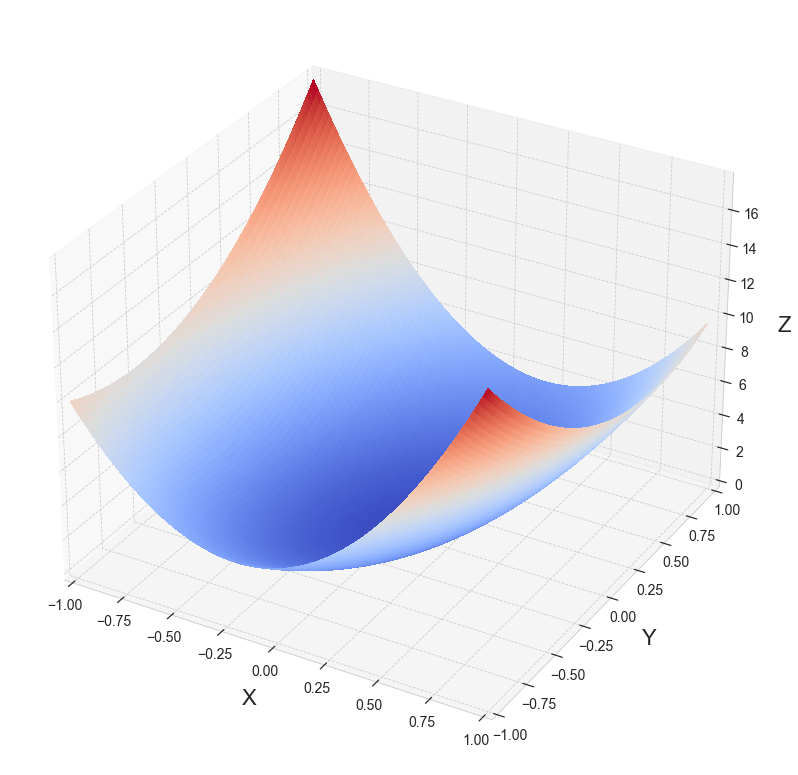

In [121]:
pol_add.plot()

In [122]:
pol_add_str = pol_add.stretch()

In [123]:
print('Coefficients of the STRETCHED polynomial:')
print(pol_add_str.a, pol_add_str.b, pol_add_str.c)

Coefficients of the STRETCHED polynomial:
2.5 -2.0 4


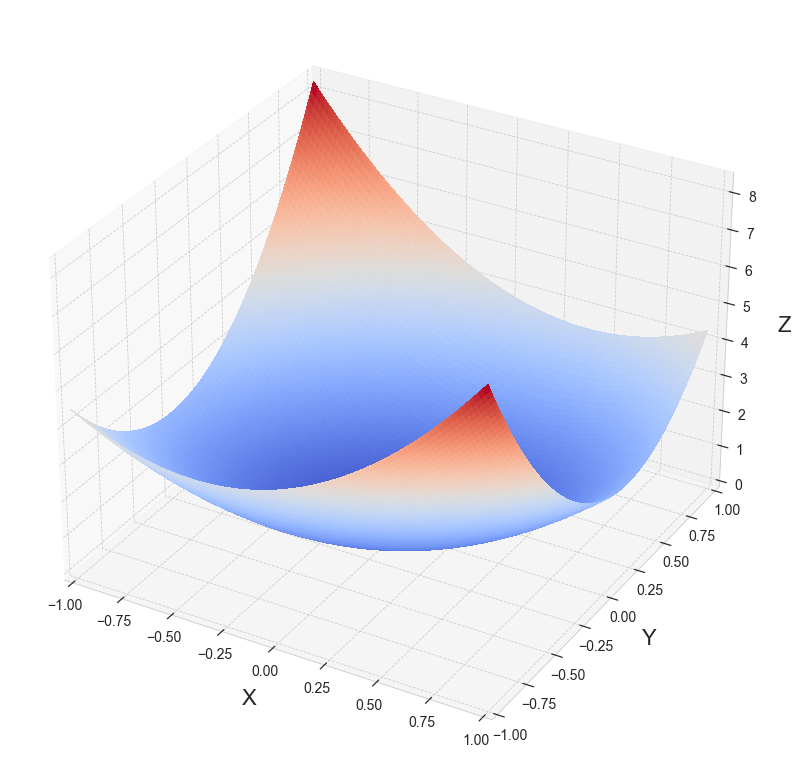

In [124]:
pol_add_str.plot()